<a href="https://colab.research.google.com/github/trisha025/SOM/blob/master/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/EKami/deep_learning_A-Z

Cloning into 'deep_learning_A-Z'...
remote: Enumerating objects: 10305, done.
remote: Total 10305 (delta 0), reused 0 (delta 0), pack-reused 10305
Receiving objects: 100% (10305/10305), 237.98 MiB | 27.70 MiB/s, done.
Resolving deltas: 100% (142/142), done.
Checking out files: 100% (10130/10130), done.


In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
#importing dataset
dataset = pd.read_csv('deep_learning_A-Z/Volume_2-Unsupervised_Deep_Learning/Part_4-Self_Organizing_Maps-SOM/Section_20-Building_a_SOM/Credit_Card_Applications.csv')

In [0]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [0]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

In [0]:
X = sc.fit_transform(X)

In [15]:
#uploading data file (code snippet available in Google Colab)
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving minisom.py to minisom.py
User uploaded file "minisom.py" with length 10989 bytes


In [0]:
#training the SOM
from minisom import MiniSom

In [0]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

In [0]:
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [0]:
#data visualisation
from pylab import bone, pcolor, colorbar, plot, show 

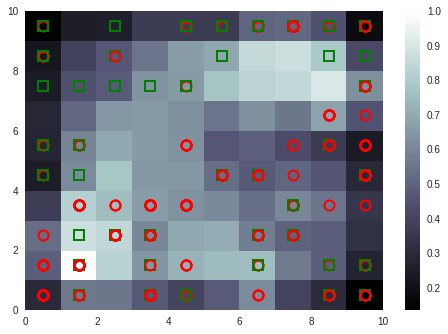

In [33]:
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5,
      w[1] + 0.5,
      markers[y[i]],
      markeredgecolor = colors[y[i]],
      markerfacecolor = 'None',
      markersize = 10,
      markeredgewidth = 2)

In [0]:
# Finding the frauds
mappings = som.win_map(X)
frauds = mappings[(1,1)]
frauds = sc.inverse_transform(frauds)

In [36]:
print(frauds)

[[1.5699839e+07 0.0000000e+00 2.8170000e+01 5.8500000e-01 2.0000000e+00
  6.0000000e+00 4.0000000e+00 4.0000000e-02 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 2.6000000e+02 1.0050000e+03]
 [1.5672894e+07 0.0000000e+00 1.8580000e+01 1.0000000e+01 2.0000000e+00
  2.0000000e+00 4.0000000e+00 4.1500000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 8.0000000e+01 4.3000000e+01]
 [1.5575605e+07 0.0000000e+00 2.4750000e+01 1.3665000e+01 2.0000000e+00
  1.1000000e+01 8.0000000e+00 1.5000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 2.8000000e+02 2.0000000e+00]
 [1.5646594e+07 0.0000000e+00 1.5920000e+01 2.8750000e+00 2.0000000e+00
  1.1000000e+01 4.0000000e+00 8.5000000e-02 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.2000000e+02 1.0000000e+00]
 [1.5593959e+07 0.0000000e+00 2.1750000e+01 1.7500000e+00 1.0000000e+00
  5.0000000e+00 3.0000000e+00 0.0000000e+00 0.0000000e+00 0.